In [8]:
import pandas as pd 
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')  # Reset Matplotlib style
sns.set_style("white")    # Set Seaborn style to "white"

# Detect encoding
with open('./data/Global_Education.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Read CSV with detected encoding
df = pd.read_csv('./data/Global_Education.csv', encoding=encoding)
df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


<Figure size 4500x1800 with 0 Axes>

## Gender Disparity in terms of Out of School Rate

In [40]:
# average OOSR of male 
df['Disparity_OOSR_Male'] = (df['OOSR_Pre0Primary_Age_Male'] + df['OOSR_Primary_Age_Male'] +
                                 df['OOSR_Lower_Secondary_Age_Male'] + df['OOSR_Upper_Secondary_Age_Male'])/4
# average OOSR of female 
df['Disparity_OOSR_Female'] = (df['OOSR_Pre0Primary_Age_Female'] + df['OOSR_Primary_Age_Female'] +
                                 df['OOSR_Lower_Secondary_Age_Female'] + df['OOSR_Upper_Secondary_Age_Female'])/4
# New column for the gender difference calculation
df['Gender_Disparity_OOSR_Difference'] = df['Disparity_OOSR_Female'] - df['Disparity_OOSR_Male']
# Sort the DataFrame by 'Gender_Disparity_OOSR_Difference'
df_sorted = df.sort_values('Gender_Disparity_OOSR_Difference')

# Plotting
plt.figure(figsize=(18, 25),dpi=400)
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif'}) 
tick_positions = range(0, len(df), 6)  
sns.barplot(x='Gender_Disparity_OOSR_Difference', y='Countries and areas', data=df_sorted)
plt.yticks(ticks=tick_positions, labels=df['Countries and areas'].iloc[tick_positions])
plt.xlabel('Gender Disparity Difference')
plt.ylabel('Country')

plt.show()

### Top 15 Countries Favoring in Male

<Figure size 2000x800 with 0 Axes>

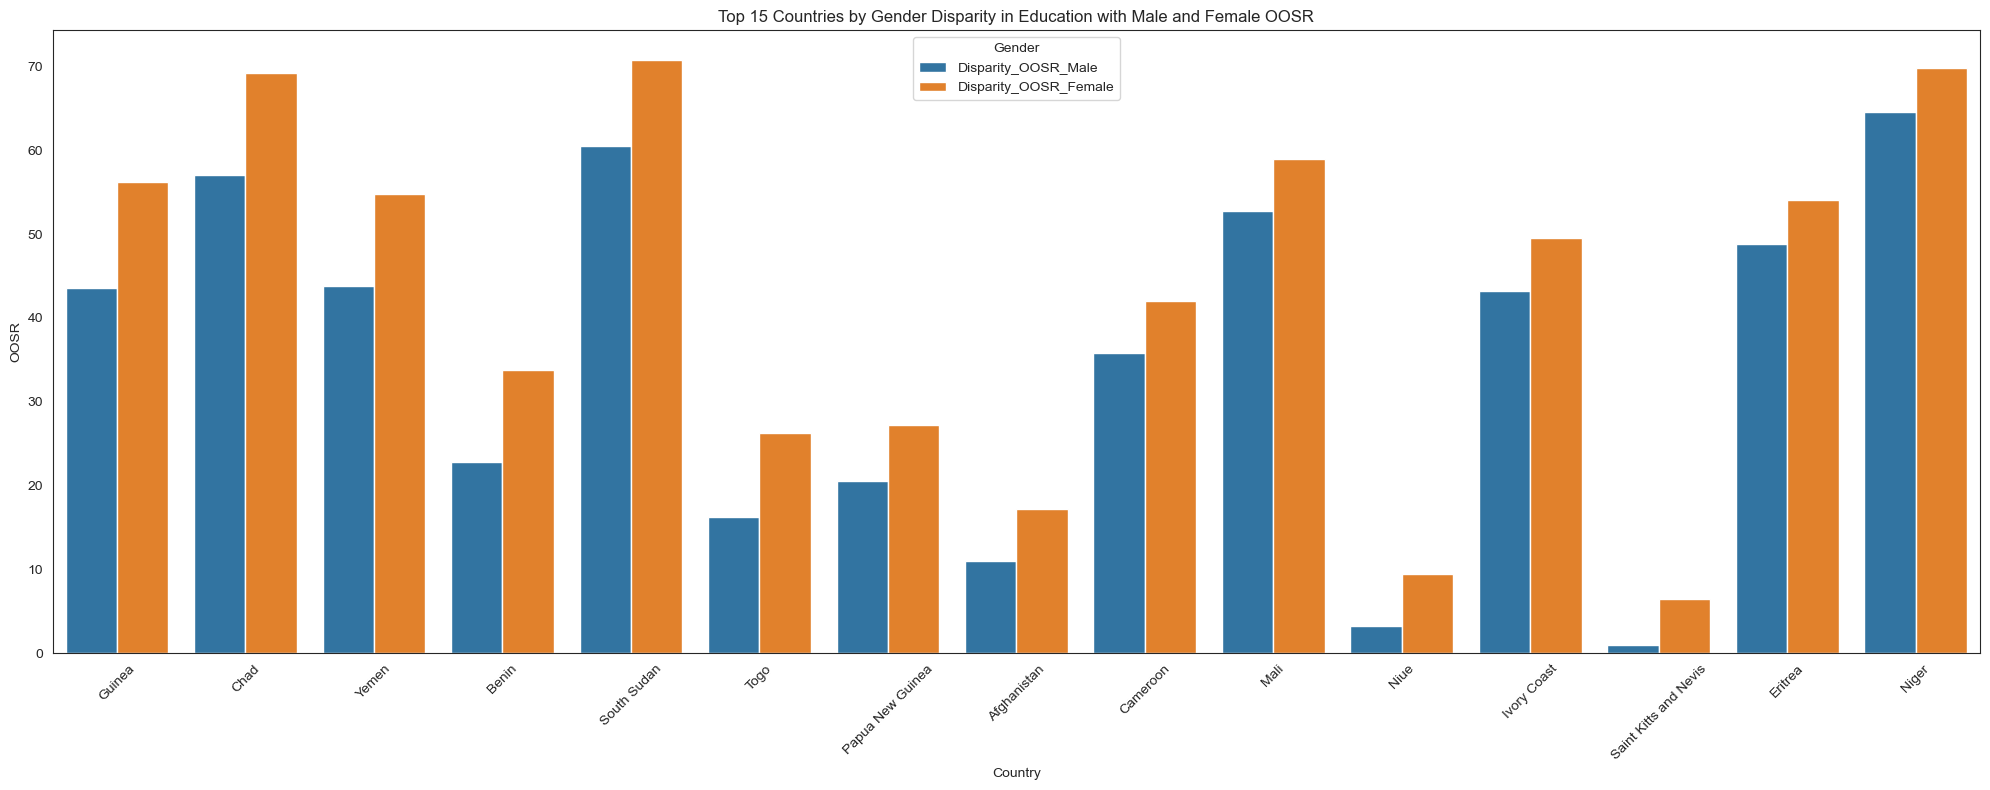

In [8]:
# Sort the DataFrame based on 'Gender_Disparity_OOSR_Difference' and select top 15
df_sorted = df.sort_values(by='Gender_Disparity_OOSR_Difference', ascending=False).head(15)
melted_df = df_sorted.melt(id_vars='Countries and areas', 
                           value_vars=['Disparity_OOSR_Male', 'Disparity_OOSR_Female'],
                           var_name='Gender', value_name='OOSR')

# Plotting
plt.figure(figsize=(20, 8))
sns.set_style("white")
sns.barplot(x='Countries and areas', y='OOSR', hue='Gender', data=melted_df)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('OOSR')
plt.title('Top 15 Countries by Gender Disparity in Education with Male and Female OOSR')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Top 15 countries favoring Female

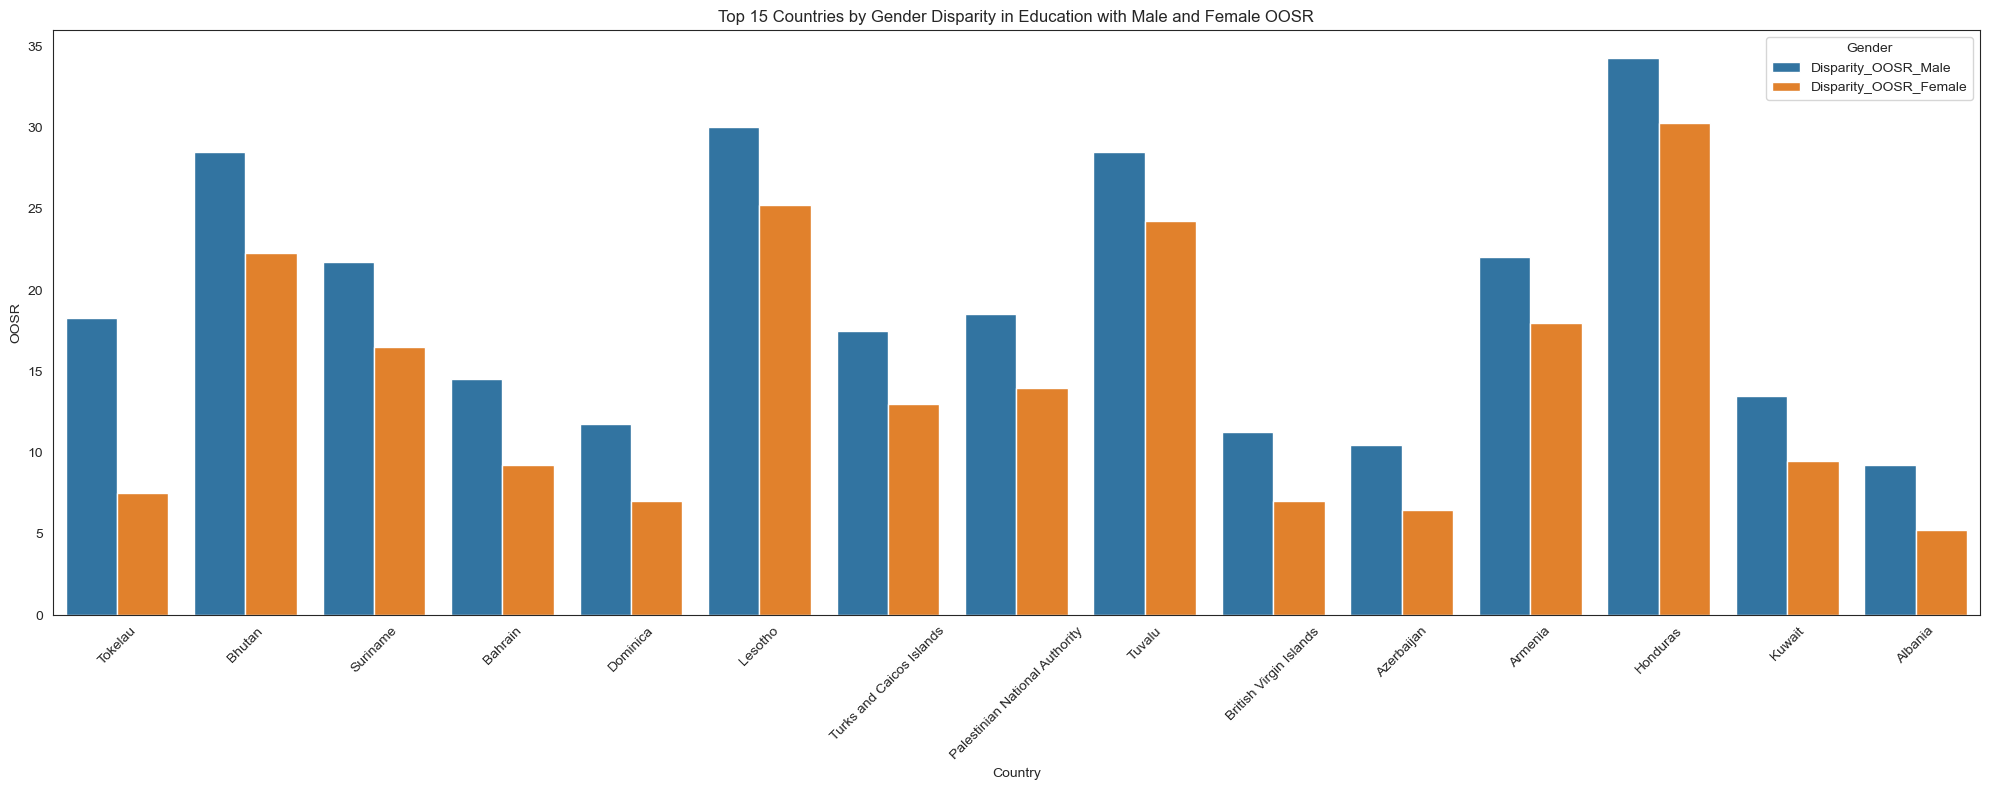

In [10]:
# Sort the DataFrame based on 'Gender_Disparity_OOSR_Difference' and select top 15
df_sorted = df.sort_values(by='Gender_Disparity_OOSR_Difference', ascending=True).head(15)
melted_df = df_sorted.melt(id_vars='Countries and areas', 
                           value_vars=['Disparity_OOSR_Male', 'Disparity_OOSR_Female'],
                           var_name='Gender', value_name='OOSR')

plt.figure(figsize=(20, 8))
sns.set_style("white")
sns.barplot(x='Countries and areas', y='OOSR', hue='Gender', data=melted_df)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('OOSR')
plt.title('Top 15 Countries by Gender Disparity in Education with Male and Female OOSR')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## Gender Disparity in terms of School Rate Completion

In [44]:
# Average School Completion Rate of Male
df['Disparity_Completion_Male'] = (df['Completion_Rate_Primary_Male'] + df['Completion_Rate_Lower_Secondary_Male'] +
                                 df['Completion_Rate_Upper_Secondary_Male'])/3
# Average School Completion Rate of Female
df['Disparity_Completion_Female'] = (df['Completion_Rate_Primary_Female'] + df['Completion_Rate_Lower_Secondary_Female'] +
                                 df['Completion_Rate_Upper_Secondary_Female'])/3
# New column for the gender difference calculation
df['Gender_Disparity_Completion_Difference'] = df['Disparity_Completion_Male'] - df['Disparity_Completion_Female']
# Sort the DataFrame by 'Gender_Disparity_OOSR_Difference'
df_sorted = df.sort_values('Gender_Disparity_Completion_Difference')

# Plotting
plt.figure(figsize=(18, 25),dpi=400)
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif'}) 
tick_positions = range(0, len(df), 6) 
sns.barplot(x='Gender_Disparity_Completion_Difference', y='Countries and areas', data=df_sorted)
plt.yticks(ticks=tick_positions, labels=df['Countries and areas'].iloc[tick_positions])
plt.xlabel('Gender Disparity Difference in School Completion Rate')
plt.ylabel('Country')
plt.show()

### Top 15 Countries Favoring in Male

<Figure size 2000x800 with 0 Axes>

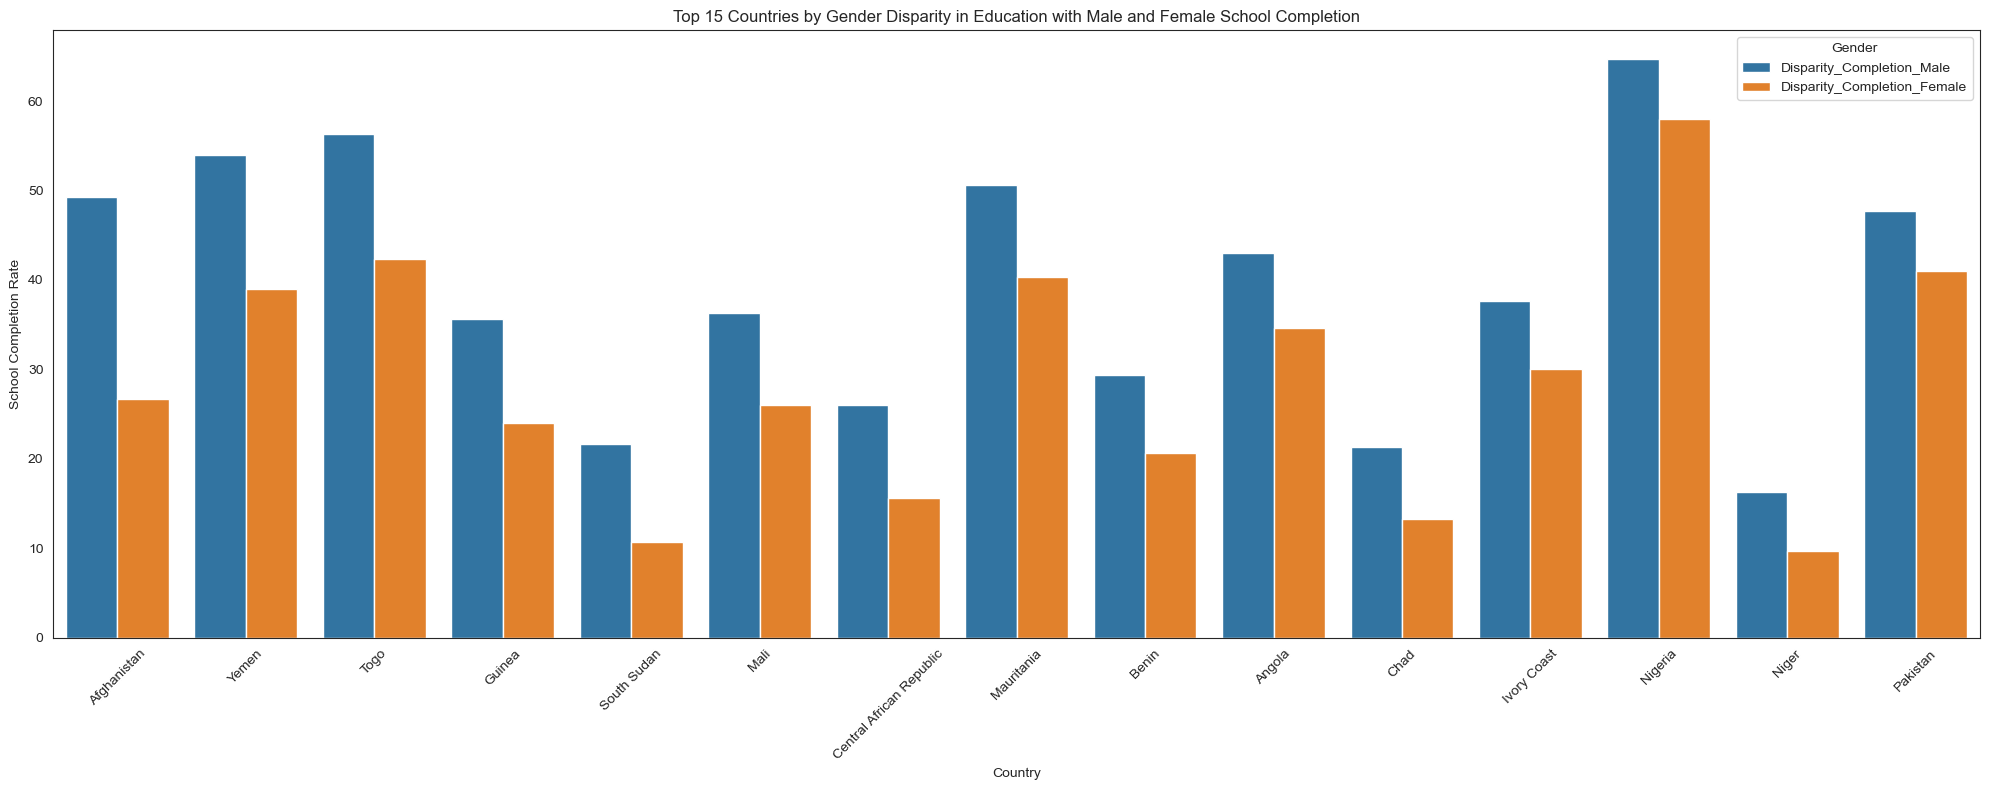

In [13]:
df_sorted = df.sort_values(by='Gender_Disparity_Completion_Difference', ascending=False).head(15)
melted_df = df_sorted.melt(id_vars='Countries and areas', 
                           value_vars=['Disparity_Completion_Male', 'Disparity_Completion_Female'],
                           var_name='Gender', value_name='Completion')

# Plotting
plt.figure(figsize=(20, 8))
sns.set_style("white")
sns.barplot(x='Countries and areas', y='Completion', hue='Gender', data=melted_df)

plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('School Completion Rate')
plt.title('Top 15 Countries by Gender Disparity in Education with Male and Female School Completion')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

### Top 15 Countries Favoring in Female

<Figure size 2000x800 with 0 Axes>

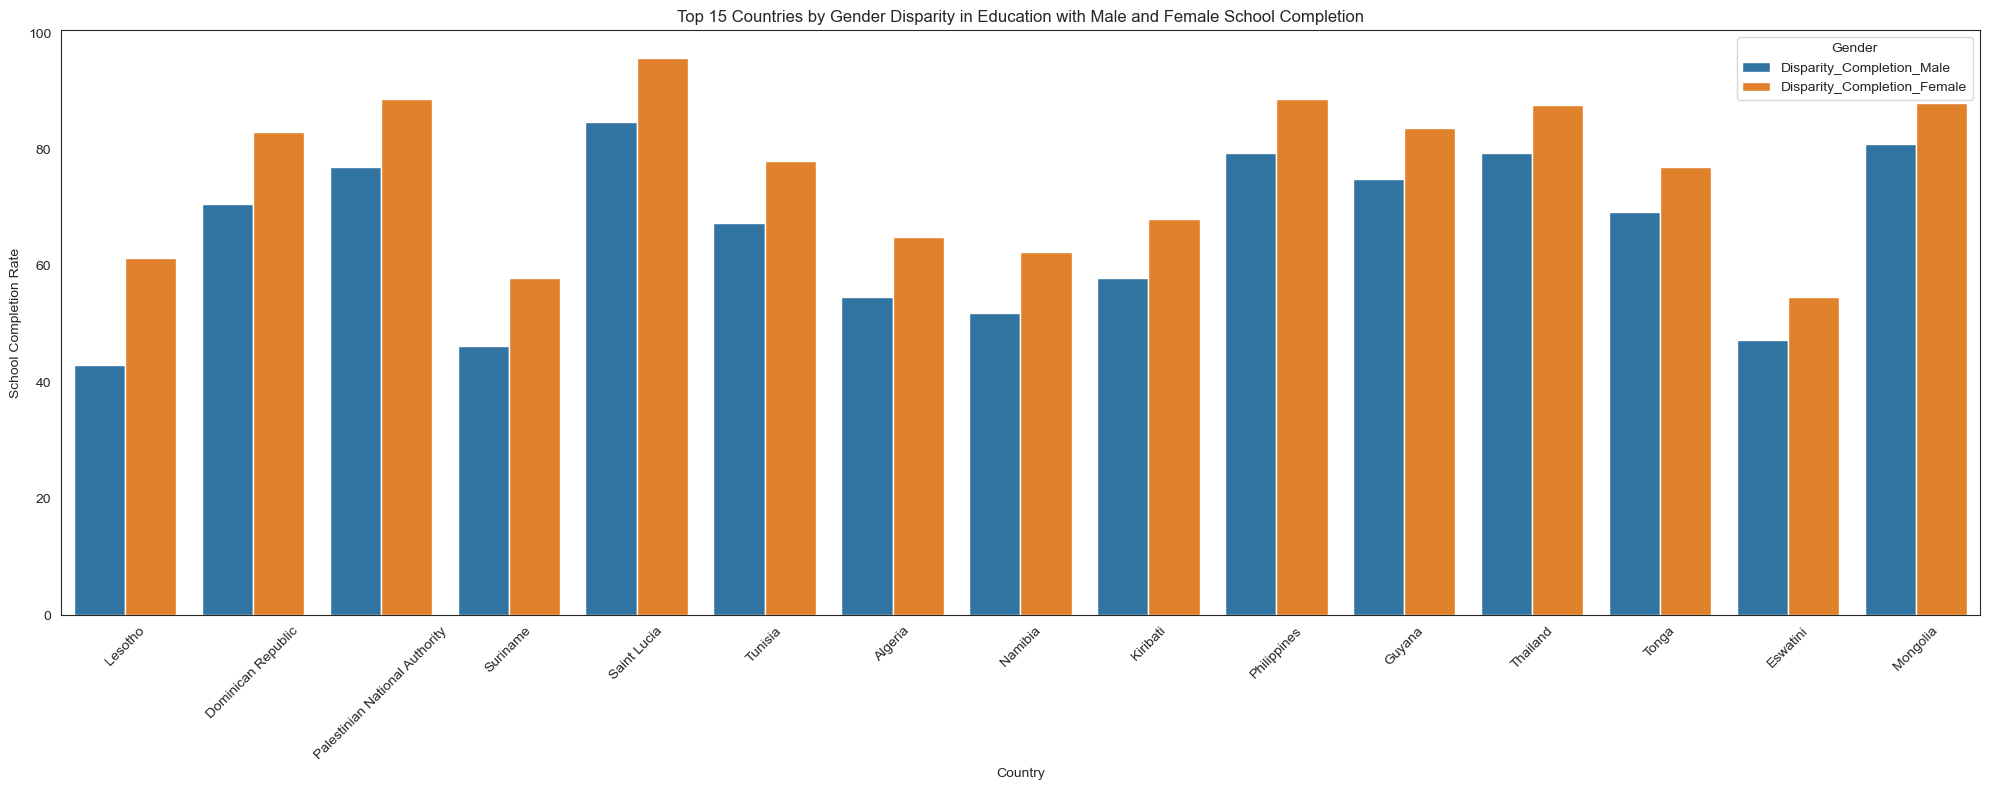

In [14]:
df_sorted = df.sort_values(by='Gender_Disparity_Completion_Difference', ascending=True).head(15)
melted_df = df_sorted.melt(id_vars='Countries and areas', 
                           value_vars=['Disparity_Completion_Male', 'Disparity_Completion_Female'],
                           var_name='Gender', value_name='Completion')

# Plotting
plt.figure(figsize=(20, 8))
sns.set_style("white")
sns.barplot(x='Countries and areas', y='Completion', hue='Gender', data=melted_df)

plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('School Completion Rate')
plt.title('Top 15 Countries by Gender Disparity in Education with Male and Female School Completion')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()